# Sheet 1: Neutral matching functions

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from multiprocessing import Process, Manager, Pool
import copy
import importlib
from scipy.optimize import curve_fit
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors
import statsmodels.nonparametric.kernel_regression as kr

import binary_hopfield as sim
import Ising_Model as im
import SED_utility as util

from pathlib import Path


this_folder = Path.cwd()
plots_folder = Path(Path.cwd()/'PLOTS')

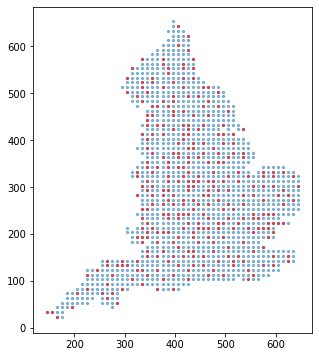

In [6]:
importlib.reload(util)
XB,XUK,survey_nodes = util.load_maps(this_folder)
XUK = XUK/1000
XB = XB/1000
XS = XUK[survey_nodes]
dmat_SED = distance_matrix(XS,XS)
plt.figure(figsize=(5,6))
plt.scatter(XUK[:,0],XUK[:,1],alpha=0.5,s=5)
plt.scatter(XS[:,0],XS[:,1],alpha=0.5,s=5,c='r')
plt.show()

In [7]:
def generate_sample_seq(trials,args):
    
    args_list=[]
    for i in range(trials):
        args_list.append(copy.deepcopy(args))
    
    n_proc = 5
    if __name__ =='__main__':
        p = Pool(n_proc)
        results  = p.map(sim.sample_sequence,args_list) 
    
    return results

## Basic arguments

In [8]:
importlib.reload(sim)
importlib.reload(util)

power=2
n=100
T=125000
neutral_sample_times = util.generate_sample_times(T,power,n)
print(neutral_sample_times)

#Determine adjacencies and set up symmetric K matrix
dmat = distance_matrix(XUK,XUK)
Adj = np.array(dmat<10.1,dtype=int)

#************************************
#Set up dictionary of parameters
args={}
args['model']='Neutral'
args['sample_times']=neutral_sample_times
args['cell_pop']  =10000

args['alpha'] = np.nan
args['Adj'] = Adj
args['K'] = sim.make_K(args['alpha'],Adj)


args['survey_nodes'] = survey_nodes

args['q'] = 2
args['tau']= 2.0
args['beta']= 3.0
args['steps']= 100
args['trials']=50
args['plot']=False


[     1     13     52    115    205    319    460    625    817   1034
   1276   1544   1837   2156   2500   2870   3265   3686   4133   4605
   5102   5625   6173   6747   7347   7972   8622   9298   9999  10726
  11479  12257  13060  13889  14744  15624  16529  17460  18417  19399
  20407  21440  22498  23582  24692  25827  26988  28174  29385  30622
  31885  33173  34487  35826  37191  38581  39996  41438  42904  44396
  45914  47457  49026  50620  52240  53885  55556  57252  58974  60721
  62494  64292  66116  67966  69840  71741  73666  75618  77595  79597
  81625  83678  85757  87861  89991  92147  94328  96534  98766 101023
 103306 105615 107949 110308 112693 115104 117540 120001 122488 125001]


In [9]:
importlib.reload(util)
alpha0=0.05
Ns = [50,10,5]
args_list = [util.make_args(args,alpha0,N) for N in Ns]

sigma =  3.1622776601683795
sigma_adj =  0.223606797749979
sigma =  3.1622776601683795
sigma_adj =  0.1
sigma =  3.1622776601683795
sigma_adj =  0.07071067811865475


# ***
# RESULTS GENERATION - ONLY RUN TO REGENERATE RESULTS.
# ***

In [299]:
#THIS CELL GENERATES THE SAMPLES
run=False
trials=200
if run:
    results_dict ={}
    for N, args in zip(Ns,args_list):
        results = generate_sample_seq(trials,args)
        results_dict[N]=results

In [129]:
bins = np.arange(0,500,10)
ds = 0.5*(bins[:-1]+bins[1:])
t_idx = np.arange(4,100,5)
t_idx

array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84,
       89, 94, 99])

T =  205
T =  1034
T =  2500
T =  4605
T =  7347
T =  10726
T =  14744
T =  19399
T =  24692
T =  30622
T =  37191
T =  44396
T =  52240
T =  60721
T =  69840
T =  79597
T =  89991
T =  101023
T =  112693
T =  125001


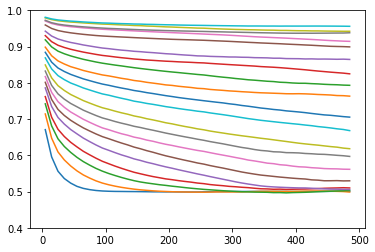

In [130]:
importlib.reload(util)
v5s = np.array([res[1] for res in results_dict[5]])
Ms_all5=[]
for i in t_idx:
    Ms = np.zeros(len(bins)-1)
    for vs in v5s[:,i]: 
        Ms += util.MProbFunc(vs,dmat,bins)
    Ms = Ms/trials
    Ms_all5.append(Ms)
    print('T = ', neutral_sample_times[i])
    plt.plot(ds,Ms)

plt.ylim(0.4,1)
plt.show()
    
    

T =  205
T =  1034
T =  2500
T =  4605
T =  7347
T =  10726
T =  14744
T =  19399
T =  24692
T =  30622
T =  37191
T =  44396
T =  52240
T =  60721
T =  69840
T =  79597
T =  89991
T =  101023
T =  112693
T =  125001


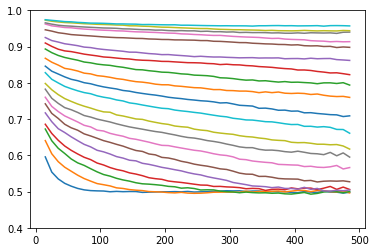

In [146]:
importlib.reload(util)
samples5 = np.array([res[0] for res in results_dict[5]])
sample_Ms5=[]
for i in t_idx:
    Ms = np.zeros(len(bins)-1)
    for sample in samples5[:,i]: 
        Ms += util.MFunc(sample,dmat_SED,bins)
    Ms = Ms/trials
    sample_Ms5.append(Ms)
    print('T = ', neutral_sample_times[i])
    plt.plot(ds[1:],Ms[1:])

plt.ylim(0.4,1)
plt.show()

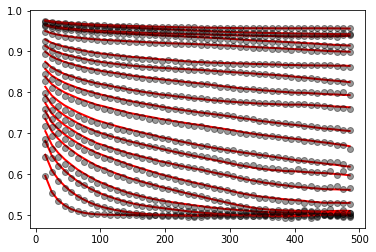

In [292]:
for Ms1,Ms2 in zip(Ms_all5,sample_Ms5):
    plt.plot(ds[1:],Ms1[1:],linewidth=2,c='r')
    plt.plot(ds[1:],Ms2[1:],'ko',alpha=0.4)
plt.show()

T =  205
T =  1034
T =  2500
T =  4605
T =  7347
T =  10726
T =  14744
T =  19399
T =  24692
T =  30622
T =  37191
T =  44396
T =  52240
T =  60721
T =  69840
T =  79597
T =  89991
T =  101023
T =  112693
T =  125001


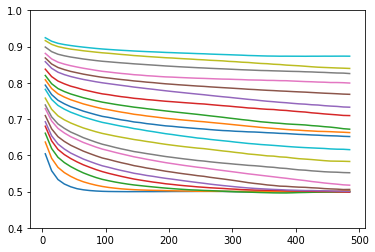

In [135]:
importlib.reload(util)
v10s = np.array([res[1] for res in results_dict[10]])
Ms_all10=[]
for i in t_idx:
    Ms = np.zeros(len(bins)-1)
    for vs in v10s[:,i]: 
        Ms += util.MProbFunc(vs,dmat,bins)
    Ms = Ms/trials
    Ms_all10.append(Ms)
    print('T = ', neutral_sample_times[i])
    plt.plot(ds[1:],Ms[1:])
    

plt.ylim(0.4,1)
plt.show()

T =  205
T =  1034
T =  2500
T =  4605
T =  7347
T =  10726
T =  14744
T =  19399
T =  24692
T =  30622
T =  37191
T =  44396
T =  52240
T =  60721
T =  69840
T =  79597
T =  89991
T =  101023
T =  112693
T =  125001


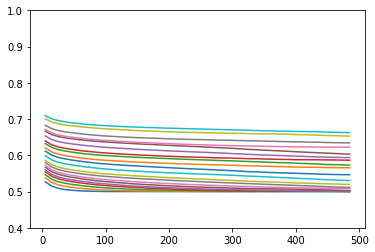

In [136]:
importlib.reload(util)
v50s = np.array([res[1] for res in results_dict[50]])
Ms_all50=[]
for i in t_idx:
    Ms = np.zeros(len(bins)-1)
    for vs in v50s[:,i]: 
        Ms += util.MProbFunc(vs,dmat,bins)
    Ms = Ms/trials
    Ms_all50.append(Ms)
    print('T = ', neutral_sample_times[i])
    plt.plot(ds,Ms)

plt.ylim(0.4,1)
plt.show()

# SAVE THE SIMULATED MATCHING CURVES

## RUN THIS CELL TO GENERATE FILE NAMES

In [11]:
file_root = 'Neutral_MVals_alpha_0.05_tau_2_N_'
file_5 = file_root + str(5) + '.csv' 
file_10 = file_root + str(10) + '.csv' 
file_50 = file_root + str(50) + '.csv'

print(file_5)
print(file_10)
print(file_50)


Neutral_MVals_alpha_0.05_tau_2_N_5.csv
Neutral_MVals_alpha_0.05_tau_2_N_10.csv
Neutral_MVals_alpha_0.05_tau_2_N_50.csv


In [328]:
if False:
    df_M5=pd.DataFrame()
    df_M5['r']=ds

    df_M10=pd.DataFrame()
    df_M10['r']=ds

    df_M50=pd.DataFrame()
    df_M50['r']=ds

    for t,M5,M10,M50 in zip(t_idx,Ms_all5,Ms_all10,Ms_all50):
        T = neutral_sample_times[t]
        Tstr = str(T) 
        df_M5[Tstr]=M5
        df_M10[Tstr]=M10
        df_M50[Tstr]=M50


    df_M5.to_csv(file_5,index=False)
    df_M10.to_csv(file_10,index=False)
    df_M50.to_csv(file_50,index=False)

# ***
# LOAD RESULTS AND PROCESS
# ***

In [12]:
df_M5 = pd.read_csv(file_5)
df_M10 = pd.read_csv(file_10)
df_M50 = pd.read_csv(file_50)
ds = df_M5['r']

In [13]:
Ms_all5 = np.array([df_M5[T].values for T in df_M5.columns[1:]])
Ms_all10 = np.array([df_M10[T].values for T in df_M10.columns[1:]])
Ms_all50 = np.array([df_M50[T].values for T in df_M50.columns[1:]])

## Calibrate logarithmic matching curve with $\epsilon = 10$

In [14]:
#*****************
#*****************
epsilon=10
#*****************
#*****************

0.0016073584356472795


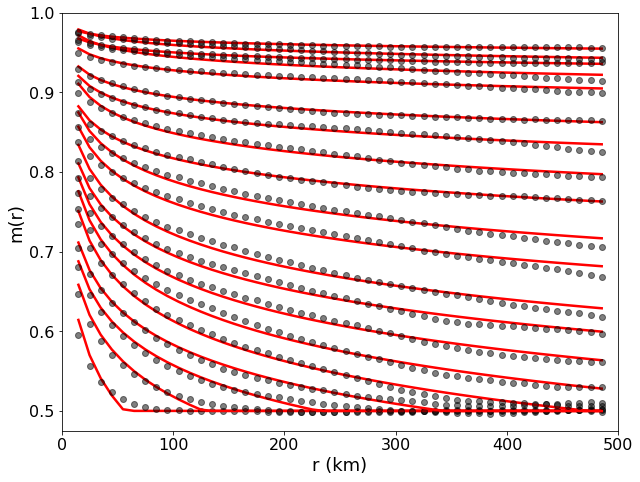

In [18]:
importlib.reload(util)
M_neut = util.make_M_neut(epsilon)
plst5=[]
plt.figure(figsize=(9,6.8))
errs=[]
for Ms in Ms_all5:
    popt, pcov = curve_fit(M_neut,ds,Ms)
    errs.append(np.sqrt(np.diag(pcov)))
    plst5.append(popt)
    plt.plot(ds[1:],M_neut(ds[1:],*popt),linewidth=2.5,c='r')
    plt.plot(ds[1:],Ms[1:],'ko',alpha=0.5)

plst5 = np.array(plst5)
errs = np.array(errs)
print(errs.mean())

plt.tick_params(labelsize=16)
plt.xlabel('r (km)',size=18)
plt.ylabel('m(r)',size=18)
plt.xlim(0,500)
plt.ylim(0.475,1)
plt.tight_layout()
plt.savefig(plots_folder/'Neutral_m_N_5.pdf')
plt.show()

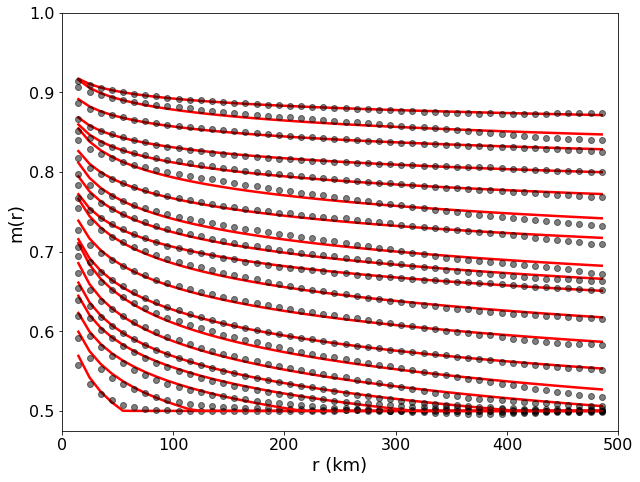

In [19]:
importlib.reload(util)
M_neut = util.make_M_neut(epsilon)
plst10=[]
plt.figure(figsize=(9,6.8))
for Ms in Ms_all10:
    popt, pcov = curve_fit(M_neut,ds,Ms)
    plst10.append(popt)
    plt.plot(ds[1:],M_neut(ds[1:],*popt),linewidth=2.5,c='r')
    plt.plot(ds[1:],Ms[1:],'ko',alpha=0.5)

plst10 = np.array(plst10)

plt.tick_params(labelsize=16)
plt.xlabel('r (km)',size=18)
plt.ylabel('m(r)',size=18)
plt.xlim(0,500)
plt.ylim(0.475,1)
plt.tight_layout()
plt.savefig(plots_folder/'Neutral_m_N_10.pdf')
plt.show()

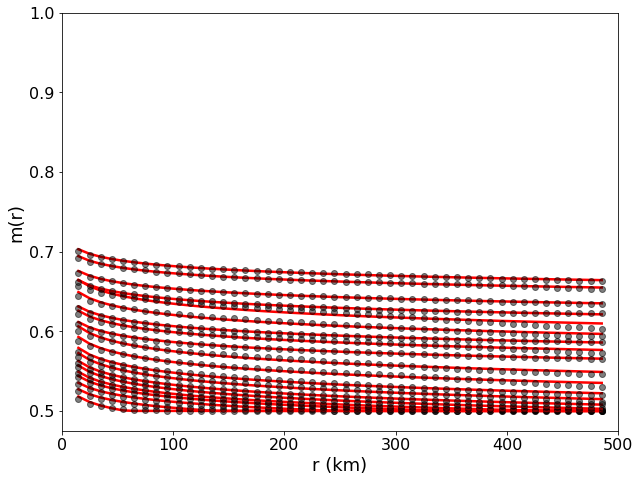

In [20]:
importlib.reload(util)
M_neut = util.make_M_neut(epsilon)
plst50=[]
plt.figure(figsize=(9,6.8))
for Ms in Ms_all50:
    popt, pcov = curve_fit(M_neut,ds,Ms)
    plst50.append(popt)
    plt.plot(ds[1:],M_neut(ds[1:],*popt),linewidth=2.5,c='r')
    plt.plot(ds[1:],Ms[1:],'ko',alpha=0.5)

plst50 = np.array(plst50)

plt.tick_params(labelsize=16)
plt.xlabel('r (km)',size=18)
plt.ylabel('m(r)',size=18)
plt.xlim(0,500)
plt.ylim(0.475,1)
plt.tight_layout()
plt.savefig(plots_folder/'Neutral_m_N_50.pdf')
plt.show()

# Find $b-c$ relationship

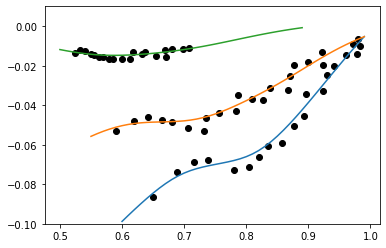

In [21]:
kreg5 = kr.KernelReg(plst5[:,1],plst5[:,0],var_type='c',bw=[0.05])
bvals=np.arange(0.6,1,0.01)
c5 = kreg5.fit(bvals)[0]
plt.plot(plst5[:,0],plst5[:,1],'ko')
plt.plot(bvals,c5)


kreg10 = kr.KernelReg(plst10[:,1],plst10[:,0],var_type='c',bw=[0.05])
bvals=np.arange(0.55,1,0.01)
c10 = kreg10.fit(bvals)[0]
plt.plot(plst10[:,0],plst10[:,1],'ko')
plt.plot(bvals,c10)


kreg50 = kr.KernelReg(plst50[:,1],plst50[:,0],var_type='c',bw=[0.05])
bvals=np.arange(0.5,0.9,0.01)
c50 = kreg50.fit(bvals)[0]
plt.plot(plst50[:,0],plst50[:,1],'ko')
plt.plot(bvals,c50)

plt.ylim(-0.1,0.01)


plt.show()

In [22]:
df_bc=pd.DataFrame()
df_bc['b']=np.array([0.7,0.775,0.85,0.925,0.99])
df_bc['c']=kreg5.fit(df_bc['b'])[0]
bc_file = 'neutral_N5_b_c_epsilon_{}.csv'.format(epsilon)
print(bc_file)
df_bc.to_csv(bc_file,index=False)
df_bc.head()


neutral_N5_b_c_epsilon_10.csv


,b,c
0,0.700,-0.074335
1,0.775,-0.068363
2,0.850,-0.055646
3,0.925,-0.029178
4,0.990,-0.005259


In [23]:
mu_vals = np.array([50,100,150,200,300])
df_mu=pd.DataFrame()
df_mu['mu']=mu_vals
df_mu.to_csv('interface_mu_vals.csv',index=False)
df_mu.head()


,mu
0,50
1,100
2,150
3,200
4,300


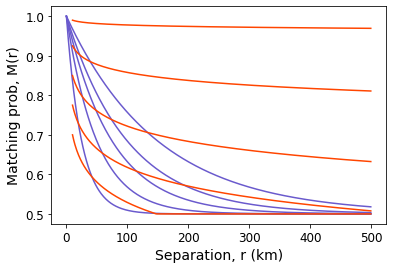

In [24]:
importlib.reload(util)
M_neut = util.make_M_neut(epsilon)

rs = np.arange(0,500,1)
for mu in df_mu['mu']:
    plt.plot(rs,util.M_potts(rs,mu),c='slateblue')
    
for b,c in zip(df_bc['b'],df_bc['c']):
    plt.plot(rs[10:],M_neut(rs[10:],b,c),c='orangered')


plt.tick_params(axis='both',  labelsize=12)

plt.xlabel('Separation, r (km)',size=14)
plt.ylabel('Matching prob, M(r)',size=14)
plt.savefig(plots_folder/'Potts_Neutral_Match_Probs_v2.pdf')
plt.show()    